[View in Colaboratory](https://colab.research.google.com/github/Rblivingstone/iMaterialist_Kaggle_competition/blob/master/reverse_image_search.ipynb)

In [0]:
# STEP 1

# #This section is base copy from google's sample import of tensorflow, keras, ploting and support libraries

#keras install libraries
!pip install -q keras
!pip install -q tqdm

#openCV is used to process and filter images
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

In [3]:
# STEP 2
# In this step we import the libraries needed to import files from google drive

# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18298 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .../0

Setting up libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Setting up unattended-upgrades (0.98ubuntu1.1) ...

Creating config file /etc/apt/apt.conf.d/20auto-upgrades with new version

Creating config file /etc/apt/apt.conf.d/50unattended-upgrades with new version
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up dirmngr (2.1.15-1ubuntu8) ...
Setting up cron (3.0pl1-128ubuntu5) ...
Adding group `crontab' (GID 102) ...
Done.
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
update-rc.d: warning: stop runlevel arguments (1) do not match cron Default-Stop values (none)
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Setting up kmod (24-1ubuntu2) ...
Setting up libdbus-glib-1-2:amd64 (0.108-2) ...
Setting up python3-gi (3.24.1-2build1) ...
Setting up module-init-tools (24-1ubuntu2) 

In [0]:
# STEP 3
# Generate auth tokens for Colab

# CLICK THE LINK GENERATED THEN COPY AND PASTE THE KEY INTO THE FIELD AND CLICK ENTER
from google.colab import auth
auth.authenticate_user()

In [5]:
# STEP 4
# Here we connect to your google drive folder.
# You can download sample puppy and rabbit images using this link: https://drive.google.com/drive/folders/1RcWFv-PDtGK4n1JgkAgL77fB-N0I4oMP?usp=sharing

# WARNING YOU MAY NEED TO RUN THIS CELL MULTIPLE TIMES TO GET A CONNECTION + KEY ESTABLISHED to your google drive.

# CLICK THE 1st LINK GENERATED THEN COPY AND PASTE THE KEY INTO THE FIELD AND CLICK ENTER

# RE-RUN THIS CELL AND CLICK THE 2nd LINK GENERATED THEN COPY AND PASTE THE KEY INTO THE FIELD AND CLICK ENTER

# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
vcode = getpass.getpass()

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.
··········


In [6]:
# STEP 5
# Create a directory and mount Google Drive using that directory.

!mkdir -p drive
!google-drive-ocamlfuse drive

# print 'Files in Drive:'
!ls drive

20160506_141038.mp4  model2_weights.h5		   resnet50_features3.csv
best.hdf5	     model.h5			   resnet50_features4.csv
CaptainsLog	     model_weights2.h5		   resnet50_features5.csv
Colab Notebooks      model_weights.h5		   resnet50_features.csv
DECISION 13-173.pdf  OH-Clubh Rental Instruc..pdf  submission.csv
Google Buzz	     pics			   test.json
kaggle.json	     resnet50_features0.csv	   train.json
kdtree.pkl	     resnet50_features1.csv	   Untitled0.ipynb
model2.h5	     resnet50_features2.csv


In [7]:
import json
print('okay')
json_data=open('drive/train.json').read()
print('cool')
data = json.loads(json_data)
print('done')
print('removed extraneous data')
urls = [obj['url'] for obj in data['images']]

okay
cool
done
removed extraneous data


In [8]:
import os
import json
print(os.listdir('drive'))
test_json_data=open('drive/test.json','rb').read()
print('cool')
test_data = json.loads(test_json_data)
print('done')
print('removed extraneous data')
test_urls = [obj['url'] for obj in test_data['images']]

['.Trash', 'Google Buzz', 'DECISION 13-173.pdf', 'OH-Clubh Rental Instruc..pdf', '20160506_141038.mp4', 'CaptainsLog', 'Colab Notebooks', 'pics', 'kaggle.json', 'train.json', 'best.hdf5', 'model.h5', 'model_weights.h5', 'model_weights2.h5', 'model2.h5', 'model2_weights.h5', 'Untitled0.ipynb', 'resnet50_features0.csv', 'test.json', 'submission.csv', 'resnet50_features1.csv', 'resnet50_features2.csv', 'resnet50_features3.csv', 'resnet50_features4.csv', 'resnet50_features5.csv', 'resnet50_features.csv', 'kdtree.pkl']
cool
done
removed extraneous data


In [9]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
import numpy as np
from urllib.request import urlopen
from PIL import Image

model = ResNet50(weights='imagenet', include_top=False)

def get_features(url):
    try:
        img_file = urlopen(url)
        im = Image.open(img_file)
    except:
        output = [0]*(256*256*3)
        output = np.array(output).reshape(256,256,3).astype('uint8')
        im = Image.fromarray(output).convert('RGB')
#img = image.load_img(img_file, target_size=(224, 224))
    im2 = im.resize((224, 224), Image.ANTIALIAS)
    x = image.img_to_array(im2)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x).reshape(1,2048)
    return features

Using TensorFlow backend.


94658560/94653016 [==============================] - 9s 0us/step


In [0]:
import pandas as pd
#pd.DataFrame().to_csv('drive/resnet50_features.csv')
def convert_data(j):
    df = pd.read_csv('drive/resnet50_features.csv')
    X = []
    i = 0
    for url in urls[10000*j:10000*j+10000]:
        if i == 1:
            df = df.drop('Unnamed: 0',axis=1)
        v=str(round(100*(i)/10000,4))
        print('\r','Status: ',v,'% Complete for Group ',str(j),end='')
        X.append(get_features(url))
        #print(url)
        i += 1
    df = pd.DataFrame(np.array(X).reshape(i,2048))
    df.to_csv('drive/resnet50_features{0}.csv'.format(j),index=None)
    
    return df

In [12]:
df = pd.read_csv('drive/resnet50_features0.csv')
for j in range(4):
    temp = convert_data(6+j)
    df = pd.concat([df,temp],axis=0,ignore_index=True)
df.to_csv('drive/resnet50_features.csv')

NameError: ignored

In [0]:
df = pd.read_csv('drive/resnet50_features0.csv')
for j in range(5):
    temp=pd.read_csv('drive/resnet50_features{0}.csv'.format(j+1))
    df = pd.concat([df,temp],axis=0,ignore_index=True)

In [16]:
import pandas as pd
df.to_csv('drive/resnet50_features.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.000000,0.900655,0.049477,2.842717,0.000000,0.135196,0.062587,0.101447,3.323108,0.230237,...,0.521378,0.122177,0.095063,0.792104,0.006156,0.000000,0.082361,0.482548,0.103766,0.172253
1,0.884691,0.008406,0.202672,1.194401,0.014277,0.032951,0.318458,0.529417,0.438163,0.206353,...,1.061789,1.020632,0.401021,0.993799,1.489655,0.646762,1.321408,0.170909,0.531617,0.221567
2,0.021923,1.065957,0.132632,0.094852,0.007371,0.013645,0.029188,1.167987,0.041438,0.002274,...,0.021977,0.040770,0.000057,1.154979,0.447323,0.000000,0.388462,0.000000,0.320249,0.020993
3,1.119502,3.362255,0.293318,0.023662,0.085780,0.009690,0.137069,0.000000,0.128337,0.000000,...,3.807688,0.650549,0.000000,0.256283,0.100048,0.000000,0.023529,0.883104,0.783641,1.926396
4,0.089269,0.319290,0.088842,0.582115,0.000000,0.004862,0.139435,0.051581,0.786064,0.000000,...,0.000000,0.210453,0.021886,0.045716,0.130157,0.000000,0.117761,0.153656,0.000000,0.019208
5,0.095728,3.605266,0.011238,0.025195,0.007260,0.060834,0.379011,0.286839,0.000000,0.000000,...,0.810396,0.301206,0.497435,0.039140,0.052738,0.000000,0.426278,0.002559,0.080219,1.015036
6,0.464170,0.402287,0.094076,2.634058,0.447448,0.019458,0.473085,0.920162,0.228260,0.540116,...,0.062418,0.943358,0.193816,1.459701,0.043161,0.006393,0.379037,0.018207,0.016458,0.010711
7,0.171844,1.369789,0.000000,3.757146,0.007409,0.013374,0.871473,0.317537,0.025117,0.511856,...,0.000000,0.125012,0.068294,0.588074,0.073859,0.000000,0.009793,0.191883,0.120564,3.356028
8,0.051267,1.023688,0.021496,0.461265,0.091069,0.022196,0.064062,2.082602,0.389039,0.649418,...,0.928236,0.000000,0.000000,0.381906,0.403480,0.314434,0.242547,1.177277,0.828898,0.006959
9,0.805034,0.937586,0.008252,1.970554,0.134999,0.013503,0.485092,1.999924,1.661854,2.241386,...,0.170964,0.058864,0.438907,0.110311,0.350978,0.185444,0.478897,0.136286,0.308691,2.861433


In [14]:
from sklearn.externals import joblib
from sklearn.neighbors import KDTree
kdt = KDTree(df, leaf_size=3, metric='euclidean')
joblib.dump(kdt, 'drive/kdtree.pkl')

['drive/kdtree.pkl']

In [0]:
from sklearn.externals import joblib
from sklearn.neighbors import KDTree
kdt = joblib.load('drive/kdtree.pkl')

In [0]:
import numpy as np
output = []
for dat in data['annotations']:
  temp = [0]*228
  for obj in dat['labelId']:
    temp[int(obj)-1] = 1
  output.append(temp)
depvar = np.array(output)

def predict(url):
    y=[]
    x = get_features(url)
    neighbors = kdt.query(x, k=2, return_distance=False)
    for neighbor in neighbors:
        y.append(depvar[neighbor])
    y = np.array(y)
    y = y.reshape(2,228)
    y = np.mean(y,axis=0)
    li = {}
    output=[]
    for i in range(len(y)):
        if y[i]>=0.5:
            li[i+1]=y[i]
            output.append(i+1)
    return output

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def display_matches(url):
    x = get_features(url)
    try:
        img_file = urlopen(url)
        im = Image.open(img_file)
    except:
        output = [0]*(256*256*3)
        output = np.array(output).reshape(256,256,3).astype('uint8')
        im = Image.fromarray(output)
#img = image.load_img(img_file, target_size=(224, 224))
    im2 = im.resize((224, 224), Image.ANTIALIAS)
    x2 = np.asarray(im2)
    plt.imshow(x2)
    plt.grid(False)
    plt.show()
    neighbors = kdt.query(x, k=10, return_distance=False)
    print(neighbors[0][1:])
    matches=[]
    for neighbor in neighbors[0][1:]:
        #print(neighbor)
        try:
            img_file = urlopen(urls[neighbor])
            im = Image.open(img_file)
        except:
            output = [0]*(224*224*3)
            output = np.array(output).reshape(224,224,3).astype('uint8')
            im = Image.fromarray(output)
    #img = image.load_img(img_file, target_size=(224, 224))
        im2 = im.resize((224, 224), Image.ANTIALIAS)
        temp = np.asarray(im2)
        matches.append(temp)

    matches=np.array(matches).reshape(3,3,224,224,3).transpose(0,2,1,3,4).reshape(3*224,3*224,3)
    plt.imshow(matches)
    plt.grid(False)
    plt.show()
    return(None)
    

['30', '66', '153', '105', '204']
[17, 19, 66, 91, 105, 106, 138, 153, 205, 222]


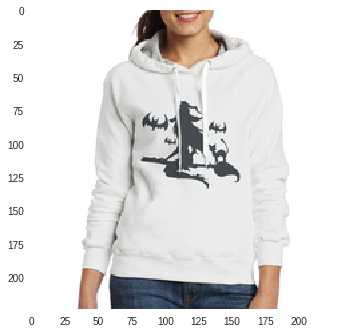

[32268 33968 29015 16826 57131 26606  3204 42131  5462]


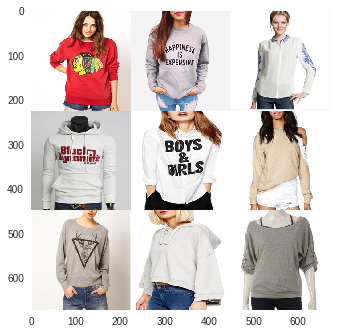

In [91]:
num =108931

print(data['annotations'][num]['labelId'])
print(predict(urls[num]))
display_matches(urls[num])

In [1]:
display_matches(urls[108951])

NameError: ignored

In [0]:
with open('drive/submission.csv','w') as file:
    i=1
    file.write('image_id,label_id')
    for url in test_urls:
        preds = predict(url)
        s=''
        for pred in preds:
            s+=str(pred)+' '
        line = str(i)+','+s
        file.write(line)
        file.write('\n')
        i+=1
        print('\r',str(i),end='')

 1295

In [20]:
len(test_urls)

39706